# Emotion Detector using kNN

This notebook uses our custom emotion dataset (from datasetMaker) to perform several tasks:

1. Evaluate intraclass spread and interclass distances
2. Plot a histogram for an example feature
3. Compute Minkowski distances for two feature vectors
4. Split the dataset into training and test sets
5. Train a kNN classifier (with various k values)
6. Evaluate the accuracy, confusion matrix, and classification report

Note: The dataset is assumed to be in CSV format (e.g. `face_data_multi.csv`). If your data is in Excel format, simply replace `pd.read_csv` with `pd.read_excel`.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.spatial import distance

data_df = pd.read_csv('face_data_multi.csv')

print('DataFrame shape:', data_df.shape)

labels = data_df['emotion'].values.astype(int)
data = data_df.drop(columns=['emotion']).values

print('Data shape:', data.shape)
print('Labels shape:', labels.shape)
print('Unique labels:', np.unique(labels))

KeyboardInterrupt: 

## A1. Compute Class Centroids, Spread, and Interclass Distances

For each class we compute the mean feature vector (centroid) and the standard deviation (spread). Then, for any two classes, we compute the Euclidean distance between the centroids.

In [ ]:
unique_labels = np.unique(labels)
centroids = {}

for label in unique_labels:
    class_data = data[labels == label]
    centroid = class_data.mean(axis=0)
    centroids[label] = centroid
    print(f"Centroid for class {label}:", centroid)

spreads = {}
for label in unique_labels:
    class_data = data[labels == label]
    spread = class_data.std(axis=0)
    spreads[label] = spread
    print(f"Spread for class {label}:", spread)

# Compute interclass distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:
            c1 = centroids[label1]
            c2 = centroids[label2]
            d = np.linalg.norm(c1 - c2)
            distances[(label1, label2)] = d
            print(f"Distance between class {label1} and class {label2}: {d}")

Centroid for class 0: [108.68360762 105.00064537 101.62132946 ... 109.62762181 110.57341078
 112.10971281]
Centroid for class 1: [118.40271443 115.53888085 112.65735899 ... 109.37590388 110.49293581
 111.19879853]
Centroid for class 2: [107.1466184  106.03142998 104.59503044 ... 104.89468488 105.11074543
 105.620701  ]
Centroid for class 3: [116.30002019 113.94467999 112.03654351 ... 107.71330507 108.5231173
 109.31011508]
Spread for class 0: [80.0124653  78.70167017 77.75574055 ... 76.69366629 77.26868601
 77.87944137]
Spread for class 1: [79.14004379 77.83532144 76.61615949 ... 75.46139666 75.67253315
 76.13858539]
Spread for class 2: [77.91235098 76.87095778 75.79527171 ... 74.30435058 74.65241542
 75.07171572]
Spread for class 3: [82.84379226 81.1851603  80.20854655 ... 77.25569453 78.22442774
 79.00794347]
Distance between class 0 and class 1: 355.4459330724107
Distance between class 0 and class 2: 323.50841049675313
Distance between class 0 and class 3: 366.13504434412226
Distanc

## A2. Plot Histogram for an Example Feature

Select one feature (pixel) from the dataset, plot its histogram (using buckets) and compute the mean and variance.

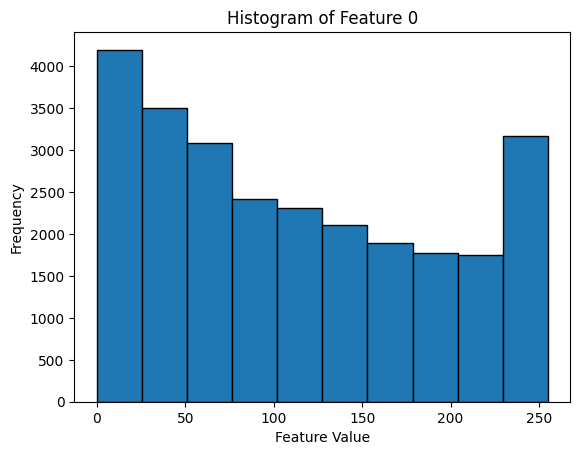

Mean of feature 0: 113.09863828813366
Variance of feature 0: 6389.024942647399


In [ ]:
feature_index = 0 
feature_data = data[:, feature_index]

hist, bin_edges = np.histogram(feature_data, bins=10)
plt.hist(feature_data, bins=10, edgecolor='black')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Feature {feature_index}')
plt.show()

mean_feature = np.mean(feature_data)
variance_feature = np.var(feature_data)
print(f"Mean of feature {feature_index}: {mean_feature}")
print(f"Variance of feature {feature_index}: {variance_feature}")

## A3. Minkowski Distances Between Two Feature Vectors for Varying r

Take two feature vectors from the dataset and compute the Minkowski distance for r values from 1 to 10. Then, plot the distance versus r.

Minkowski distance with r=1: 215966.0
Minkowski distance with r=2: 5542.739936168754
Minkowski distance with r=3: 1745.6540834153727
Minkowski distance with r=4: 1007.5817479906569
Minkowski distance with r=5: 734.7607665295196
Minkowski distance with r=6: 599.8540239352042
Minkowski distance with r=7: 521.2700154282082
Minkowski distance with r=8: 470.4632029713977
Minkowski distance with r=9: 435.1675068065254
Minkowski distance with r=10: 409.32943429559174


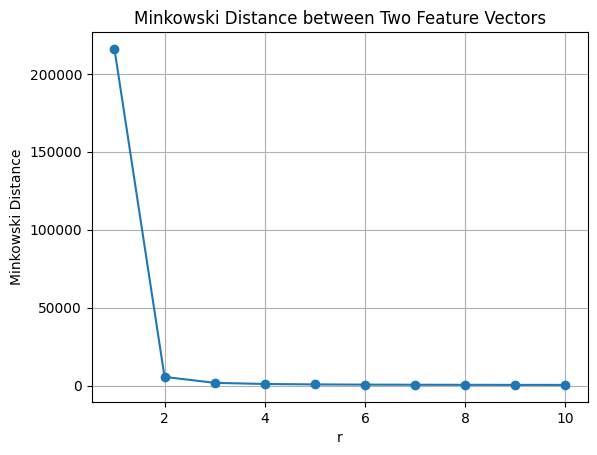

In [ ]:
fv1 = data[0]
fv2 = data[1]

r_values = range(1, 11)
minkowski_distances = []
for r in r_values:
    d = distance.minkowski(fv1, fv2, r)
    minkowski_distances.append(d)
    print(f"Minkowski distance with r={r}: {d}")

plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.grid(True)
plt.show()

## A4. Split Dataset into Training and Test Sets

Select (for example) two classes from the dataset and split the data into training (70%) and test (30%) sets.

In [ ]:
selected_classes = [0, 1]  
mask = np.isin(labels, selected_classes)
selected_data = data[mask]
selected_labels = labels[mask]

X_train, X_test, y_train, y_test = train_test_split(selected_data, selected_labels, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10630, 2304)
X_test shape: (4557, 2304)
y_train shape: (10630,)
y_test shape: (4557,)


## A5. Train a kNN Classifier with k = 3

Train a kNN model on the training set.

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
print("Trained kNN classifier with k=3")

Trained kNN classifier with k=3


## A6. Test the Accuracy of the kNN Classifier

Evaluate the accuracy on the test set.

In [ ]:
accuracy = knn_classifier.score(X_test, y_test)
print(f"Accuracy of kNN classifier (k=3): {accuracy}")

Accuracy of kNN classifier (k=3): 0.6061005047180162


## A7. Use the Predictor on Test Vectors

Predict the class of a test vector.

In [ ]:
test_vector = X_test[0]
predicted_class = knn_classifier.predict([test_vector])
print(f"Predicted class for the test vector: {predicted_class}")

Predicted class for the test vector: [0]


## A8. Vary k from 1 to 11 and Plot the Accuracy

Try different values of k and see how the accuracy changes.

Accuracy for k=1: 0.6122448979591837
Accuracy for k=2: 0.5490454246214614
Accuracy for k=3: 0.6061005047180162
Accuracy for k=4: 0.5817423743691025
Accuracy for k=5: 0.6203642747421549
Accuracy for k=6: 0.5997366688610928
Accuracy for k=7: 0.619705946894887
Accuracy for k=8: 0.6023699802501645
Accuracy for k=9: 0.6203642747421549
Accuracy for k=10: 0.6115865701119158
Accuracy for k=11: 0.6225587008997148


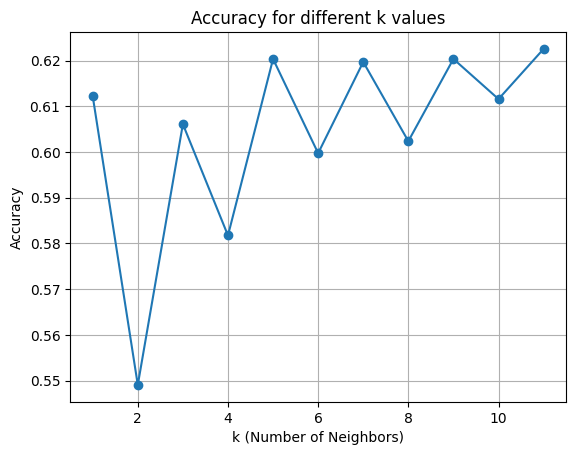

In [ ]:
k_values = range(1, 12)
accuracies = []
for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train, y_train)
    acc = model_k.score(X_test, y_test)
    accuracies.append(acc)
    print(f"Accuracy for k={k}: {acc}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values')
plt.grid(True)
plt.show()

## A9. Evaluate Confusion Matrix and Classification Report

Compute the confusion matrix, precision, recall, and F1-score for both the training and test sets to assess model performance.

In [ ]:
knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(X_train, y_train)

y_pred_test = knn_k1.predict(X_test)
y_pred_train = knn_k1.predict(X_train)

print("Confusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred_test))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix for Training Set:")
print(confusion_matrix(y_train, y_pred_train))

print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

Confusion Matrix for Test Set:
[[1144  727]
 [1040 1646]]
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.52      0.61      0.56      1871
           1       0.69      0.61      0.65      2686

    accuracy                           0.61      4557
   macro avg       0.61      0.61      0.61      4557
weighted avg       0.62      0.61      0.62      4557

Confusion Matrix for Training Set:
[[4327    0]
 [   0 6303]]
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4327
           1       1.00      1.00      1.00      6303

    accuracy                           1.00     10630
   macro avg       1.00      1.00      1.00     10630
weighted avg       1.00      1.00      1.00     10630

